In [ ]:
import im
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [167]:
df = pd.read_csv('../data/preprocessed_data.csv')

In [168]:
df.head()

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,3,0.140625,0.003906,0.540078,0.474609,0.007812,0.193125,0.0000,...,False,False,False,False,True,False,True,False,False,False
1,Red,False,3,0.000000,0.000000,0.458750,0.344375,0.632500,0.541250,0.1250,...,False,True,False,False,False,False,False,False,True,False
2,Blue,False,3,1.265625,0.000000,0.510781,0.434844,0.000000,0.082812,0.0625,...,False,True,False,False,False,False,False,False,True,False
3,Red,False,3,0.000000,0.000000,0.530000,0.500000,0.370000,0.500000,0.0000,...,False,True,False,False,False,False,True,False,False,False
4,Blue,True,5,0.262573,0.015625,0.553444,0.429452,0.148796,0.000659,0.0000,...,False,True,False,False,False,False,True,False,False,False


### Normalizing data

In [169]:
df_num = df.select_dtypes(include=[float])
df_int = df.select_dtypes(include=[int])
df_other = df.select_dtypes(exclude=[float, int])

In [170]:
df_num

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_Str_Def,R_TD_Avg,R_TD_Acc,R_TD_Def,R_Sub_Avg,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,0.140625,0.003906,0.540078,0.474609,0.007812,0.193125,0.0000,0.000000,0.000000,0.0,...,0.51,0.10,0.14,0.68,0.0,180.34,177.80,155.0,32.0,36.0
1,0.000000,0.000000,0.458750,0.344375,0.632500,0.541250,0.1250,0.000000,0.500000,0.0,...,0.44,1.14,0.62,0.59,0.7,162.56,165.10,115.0,23.0,37.0
2,1.265625,0.000000,0.510781,0.434844,0.000000,0.082812,0.0625,0.000000,0.000000,0.0,...,0.41,0.77,0.55,0.75,1.1,190.50,195.58,155.0,27.0,29.0
3,0.000000,0.000000,0.530000,0.500000,0.370000,0.500000,0.0000,0.000000,0.000000,0.0,...,0.60,1.11,0.63,0.80,0.0,165.10,165.10,125.0,22.0,23.0
4,0.262573,0.015625,0.553444,0.429452,0.148796,0.000659,0.0000,0.000122,0.000244,0.0,...,0.53,0.11,0.50,0.78,0.2,193.04,200.66,205.0,32.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7897,0.031250,0.000000,0.461149,0.441250,0.228750,0.196250,0.1250,0.062500,0.000000,0.0,...,0.00,0.00,0.00,0.00,0.0,177.80,177.80,170.0,29.0,30.0
7898,0.031250,0.000000,0.461149,0.441250,0.228750,0.196250,0.1250,0.062500,0.000000,0.0,...,0.00,0.00,0.00,0.00,0.0,182.88,182.88,210.0,29.0,30.0
7899,0.031250,0.000000,0.461149,0.441250,0.228750,0.196250,0.1250,0.062500,0.000000,0.0,...,0.00,0.00,0.00,0.00,0.0,187.96,187.96,225.0,29.0,30.0
7900,0.031250,0.000000,0.461149,0.441250,0.228750,0.196250,0.1250,0.062500,0.000000,0.0,...,0.00,0.00,0.00,0.00,0.0,177.80,182.88,170.0,29.0,30.0


In [171]:
df_int

,no_of_rounds,B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,...,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage
0,3,24,0,0,1,6,6,3,0,0,...,4,8,5,0,1,0,1,6,0,0
1,3,14,0,0,1,4,4,1,0,0,...,5,8,4,0,0,1,2,3,2,0
2,3,17,0,0,1,3,5,2,0,0,...,5,7,5,0,0,0,0,4,3,0
3,3,3,0,1,0,1,1,0,0,0,...,3,5,1,0,0,1,3,1,0,0
4,5,36,1,0,1,9,11,3,0,0,...,5,9,1,0,0,1,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7897,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7898,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7899,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7900,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
df_other

,Winner,title_bout,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
1,Red,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,Blue,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
3,Red,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,Blue,True,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7897,Red,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
7898,Red,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
7899,Red,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
7900,Red,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [173]:
from sklearn.preprocessing import LabelEncoder # StandardScaler

# Ensure df_num only contains float or int columns
df_num = df.select_dtypes(include=['float64', 'int64'])

# Initialize a dictionary for label encoders
encoders = {}

#remove draws, as they are extremely rare
df = df[df['Winner'] != 'draw']
df = df.dropna(subset=['Winner'])

for col in df_other.columns:
    encoders[f'le_{col}'] = LabelEncoder()  
    df[col] = encoders[f'le_{col}'].fit_transform(df[col])  
    
    # Check mapping
    print(f"Mapping for {col}: {dict(enumerate(encoders[f'le_{col}'].classes_))}")

# # Scale only valid numerical columns
# df[df_num.columns] = scaler.fit_transform(df[df_num.columns])


Mapping for Winner: {0: 'Blue', 1: 'Red'}
Mapping for title_bout: {0: np.False_, 1: np.True_}
Mapping for weight_class_Bantamweight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Catch Weight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Featherweight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Flyweight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Heavyweight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Light Heavyweight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Lightweight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Middleweight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Open Weight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Welterweight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Women's Bantamweight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Women's Featherweight: {0: np.False_, 1: np.True_}
Mapping for weight_class_Women's Flyweight: {0: np.False_, 1: np.True_}
Mapping for w

In [174]:
df['Winner'].value_counts()

Winner
1    5122
0    2777
Name: count, dtype: int64

### Splitting into train, test

In [175]:
df.head()

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,1,0,3,0.140625,0.003906,0.540078,0.474609,0.007812,0.193125,0.0000,...,0,0,0,0,1,0,1,0,0,0
1,1,0,3,0.000000,0.000000,0.458750,0.344375,0.632500,0.541250,0.1250,...,0,1,0,0,0,0,0,0,1,0
2,0,0,3,1.265625,0.000000,0.510781,0.434844,0.000000,0.082812,0.0625,...,0,1,0,0,0,0,0,0,1,0
3,1,0,3,0.000000,0.000000,0.530000,0.500000,0.370000,0.500000,0.0000,...,0,1,0,0,0,0,1,0,0,0
4,0,1,5,0.262573,0.015625,0.553444,0.429452,0.148796,0.000659,0.0000,...,0,1,0,0,0,0,1,0,0,0


In [176]:
y = df['Winner']
X = df.drop(columns = 'Winner')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

In [177]:
print(y_train.unique())



[1 0]


In [178]:
categorical_cols = X_train.select_dtypes(include=['float']).columns
print(f"Categorical columns: {list(categorical_cols)}")

Categorical columns: ['B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_opp_GROUND_att', '

In [179]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)

In [180]:
print(y_test[y_test.isnull()])  # Check NaNs in features

Series([], Name: Winner, dtype: int64)


### Fitting baseline Random Forest

In [181]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)

In [182]:
model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=43)

In [183]:
model.oob_score_

0.6793710021321961

In [184]:
y_preds = model.predict(X_test)

In [185]:
accuracy_score(y_test, y_preds)

0.6658227848101266

In [186]:
feat_imps = {}
for i, imp in enumerate(model.feature_importances_):
    feat_imps[X_train.columns[i]] = imp

In [187]:
sorted_imp_feats = (sorted(feat_imps.items(), key = lambda x: x[1], reverse=True))
sorted_imp_feats

[('B_SLpM', np.float64(0.03052530255778385)),
 ('B_TD_Def', np.float64(0.021192667401627622)),
 ('B_Str_Acc', np.float64(0.01687158048679379)),
 ('R_SApM', np.float64(0.016543458144580983)),
 ('B_TD_Avg', np.float64(0.015091251605234817)),
 ('R_TD_Acc', np.float64(0.01430740257206212)),
 ('B_SApM', np.float64(0.013451434207157576)),
 ('R_SLpM', np.float64(0.012847026417865743)),
 ('R_age', np.float64(0.012421876670155416)),
 ('B_TD_Acc', np.float64(0.012271477203113848)),
 ('B_Str_Def', np.float64(0.012132193293277329)),
 ('R_Str_Acc', np.float64(0.011594662706326395)),
 ('R_TD_Avg', np.float64(0.01114987894196194)),
 ('R_avg_opp_SIG_STR_pct', np.float64(0.011132362186319567)),
 ('R_TD_Def', np.float64(0.011015965959343772)),
 ('R_Str_Def', np.float64(0.010908264190355385)),
 ('B_age', np.float64(0.010377058276633782)),
 ('R_avg_opp_HEAD_landed', np.float64(0.00987664286840818)),
 ('R_Sub_Avg', np.float64(0.009143746197057675)),
 ('B_avg_DISTANCE_landed', np.float64(0.00835256792634601

In [188]:
y_train.value_counts()

Winner
1    4867
0    2637
Name: count, dtype: int64

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

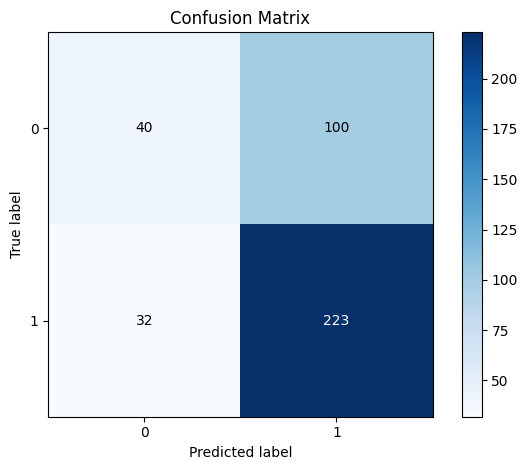

In [189]:
cm = confusion_matrix(y_test, y_preds)
classes = unique_labels(y_test, y_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

### Oversampling

In [199]:
from imblearn.over_sampling import ADASYN

In [201]:
over_sampler = ADASYN()
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

In [202]:
pd.Series(y_resampled).value_counts()

Winner
0    5034
1    4867
Name: count, dtype: int64

In [203]:
model2 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)
model2.fit(X_resampled, y_resampled)

RandomForestClassifier(oob_score=True, random_state=43)

In [204]:
model2.oob_score_

0.7810322189677811

In [205]:
y2_preds = model2.predict(X_test)

In [206]:
accuracy_score(y_test, y2_preds)

0.660759493670886

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

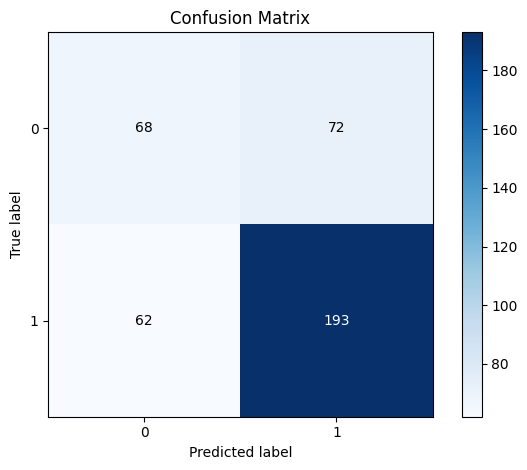

In [207]:
cm = confusion_matrix(y_test, y2_preds)
classes = unique_labels(y_test, y2_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [208]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [210]:
model3 = RandomForestClassifier(random_state=43)
rf_random = RandomizedSearchCV(estimator = model3, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

In [ ]:
model4 = rf_random.best_estimator_

In [ ]:
y3_preds = model4.predict(X_test)
accuracy_score(y_test, y3_preds)

In [ ]:
new_param_grid = {'bootstrap': [True, False],
 'max_depth': [50, 60, 70],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [600, 800, 1000, 1200],
'criterion' :['gini']}

In [ ]:
rf = RandomForestClassifier(random_state=43)
rf_grid = GridSearchCV(estimator = rf, param_grid = new_param_grid, 
                                cv = 3, verbose=2, n_jobs = -1)
rf_grid.fit(X_resampled, y_resampled)

NameError: name 'X_resampled' is not defined

In [ ]:
rf_grid.best_params_

In [ ]:
model5 = rf_grid.best_estimator_

In [ ]:
y4_preds = model5.predict(X_test)
accuracy_score(y_test, y4_preds)

In [ ]:
cm = confusion_matrix(y_test, y4_preds)
classes = unique_labels(y_test, y4_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
print(classification_report(y_test, y2_preds))

In [ ]:
print(classification_report(y_test, y3_preds))

In [ ]:
print(classification_report(y_test, y4_preds))